# Linear Models

In [1]:
import  warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set()

## Why normal distributions are normal

### 4.1

In [4]:
pos = np.random.uniform(-1, 1, (16, 1000)).sum(axis=0)

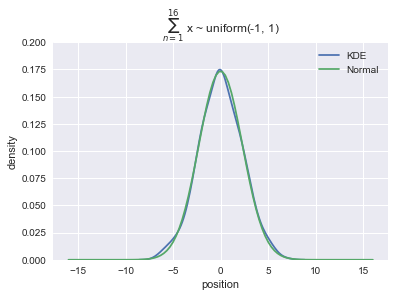

In [5]:
xs = np.linspace(-16, 16, 100)
ys = stats.norm.pdf(xs, loc=np.mean(pos), scale=np.std(pos))
f, ax = plt.subplots(1, 1)
sns.kdeplot(pos, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.set_ylim(0, 0.20)
ax.legend(loc=0)
ax.set_title("$\sum_{n=1}^{16}$ x ~ uniform(-1, 1)", pad=10)
ax.set_xlabel("position")
ax.set_ylabel("density");

### 4.2

In [6]:
(np.random.uniform(1.0, 1.1, 12)).prod()

2.063037816179513

### 4.3

In [7]:
growth = np.random.uniform(1.0, 1.1, (12, 10000)).prod(axis=0)

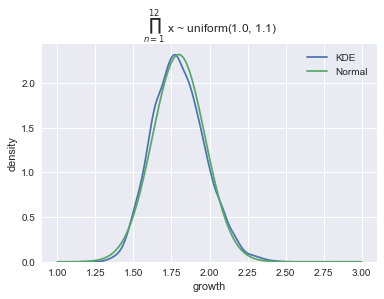

In [8]:
xs = np.linspace(1.0, 3.0, 100)
ys = stats.norm.pdf(xs, loc=np.mean(growth), scale=np.std(growth))

f, ax = plt.subplots(1, 1)
sns.kdeplot(growth, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.1)", pad=12)
ax.set_xlabel("growth")
ax.set_ylabel("density");

### 4.4

In [9]:
big = np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0)
small = np.random.uniform(1.0, 1.01, (12, 10000)).prod(axis=0)

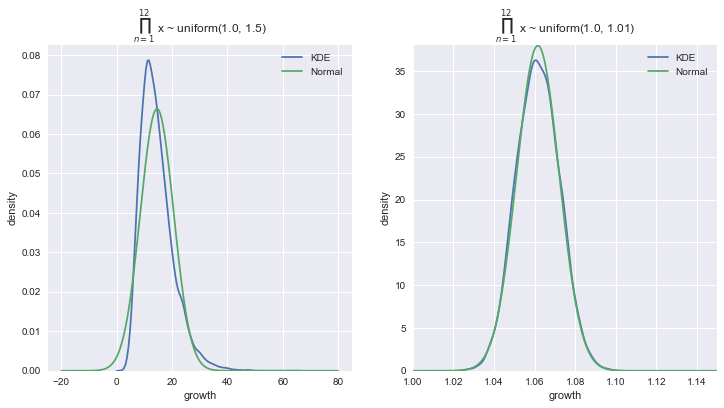

In [10]:
xs_big = np.linspace(-20.0, 80.0, 10000)
ys_big = stats.norm.pdf(xs_big, loc=np.mean(big), scale=np.std(big))
xs_small = np.linspace(1.0, 1.3, 10000)
ys_small = stats.norm.pdf(xs_small, loc=np.mean(small), scale=np.std(small))

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(12, 6)

sns.kdeplot(big, ax=ax1, label="KDE")
ax1.plot(xs_big, ys_big, label="Normal")
ax1.legend(loc=0)
ax1.set_xlabel("growth")
ax1.set_ylabel("density")
ax1.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5)", pad=12)

sns.kdeplot(small, ax=ax2, label="KDE")
ax2.plot(xs_small, ys_small, label="Normal")
ax2.set_xlim(1, 1.15)
ax2.legend(loc=0)
ax2.set_xlabel("growth")
ax2.set_ylabel("density")
ax2.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.01)", pad=12);

### 4.5

In [11]:
log_big = np.log(np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0))

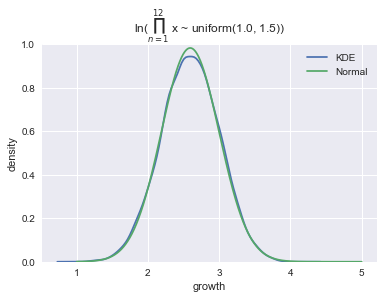

In [12]:
xs = np.linspace(1, 5, 10000)
ys = stats.norm.pdf(xs, loc=np.mean(log_big), scale=np.std(log_big))

f, ax = plt.subplots(1, 1)
sns.kdeplot(log_big, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_xlabel("growth")
ax.set_ylabel("density")
ax.set_title("ln($\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5))", pad=12);
ax.set_ylim(0, 1.0);

## A language for describing models

### 4.6

In [13]:
w = 6; n = 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(w, n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior/sum(posterior)

## A Gaussian model of height

### 4.7

In [14]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

### 4.8

In [15]:
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.9

In [16]:
d["height"].head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

### 4.10

In [17]:
d2 = d.loc[d["age"] >= 18]

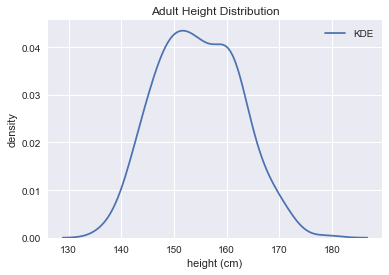

In [18]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(d2["height"], ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Adult Height Distribution");

### 4.11

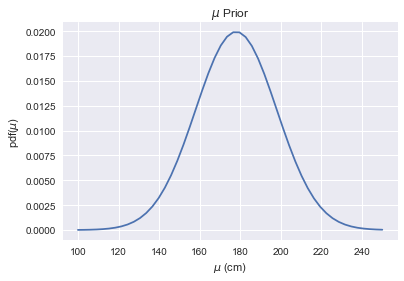

In [19]:
xs = np.linspace(100, 250)
ys = stats.norm.pdf(xs, 178, 20)

f, ax = plt.subplots(1, 1)
ax.plot(xs, ys)
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("pdf($\mu$)")
ax.set_title("$\mu$ Prior");

### 4.12

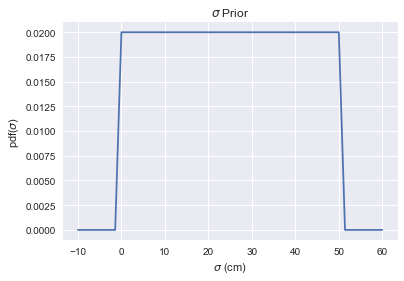

In [20]:
xs = np.linspace(-10, 60)
ys = stats.uniform.pdf(xs, 0, 50)

f, ax = plt.subplots(1, 1)
ax.plot(xs, ys)
ax.set_xlabel("$\sigma$ (cm)")
ax.set_ylabel("pdf($\sigma$)")
ax.set_title("$\sigma$ Prior");

### 4.13

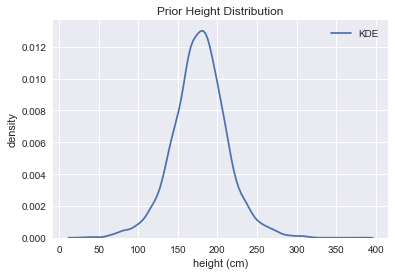

In [21]:
sample_mu = stats.norm.rvs(loc=178, scale=20, size=int(1e4))
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=int(1e4))
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)

f, ax = plt.subplots(1, 1)
sns.kdeplot(prior_h, ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Prior Height Distribution");

### 4.14

In [22]:
mu_list = np.linspace(140, 160, 200)
sigma_list = np.linspace(4, 9, 200)
(mu_grid, sigma_grid) = np.meshgrid(mu_list, sigma_list)
post_ll = np.sum([stats.norm.logpdf(height, loc=mu_grid, scale=sigma_grid) 
                  for height in d2["height"]], axis=0)
post_prod = post_ll +\
            stats.norm.logpdf(mu_grid, loc=178, scale=20) +\
            stats.uniform.logpdf(sigma_grid, loc=0, scale=50)
post_prob = np.exp(post_prod - np.max(post_prod))
post_prob = post_prob/post_prob.sum()

### 4.15

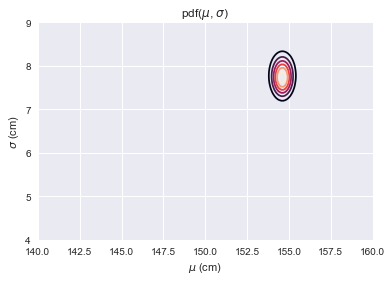

In [23]:
f, ax = plt.subplots(1, 1)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.contour(mu_grid, sigma_grid, post_prob);

### 4.16

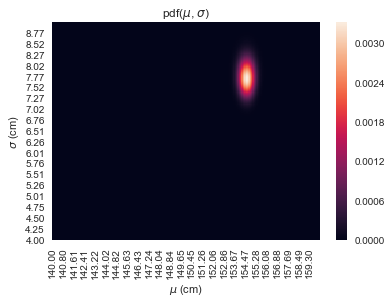

In [24]:
f, ax = plt.subplots(1, 1)
data = pd.DataFrame(post_prob, index=sigma_list, columns=mu_list)
sns.heatmap(data, ax=ax)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.set_xticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_xticklabels()])
ax.set_yticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_yticklabels()])
ax.invert_yaxis();

### 4.17

In [25]:
idxs = np.random.choice(np.arange(len(mu_list)*len(sigma_list)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list)*len(sigma_list)))
sample_mu = mu_list[idxs//len(mu_list)]
sample_sigma = sigma_list[np.mod(idxs, len(sigma_list))]

### 4.18

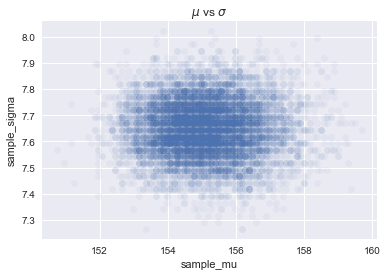

In [26]:
f, ax = plt.subplots(1, 1)
ax.plot(sample_mu, sample_sigma, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.19

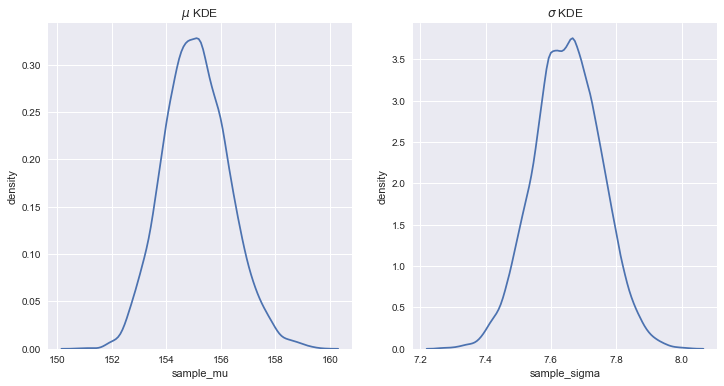

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(12, 6)
sns.kdeplot(sample_mu, ax=ax1)
sns.kdeplot(sample_sigma, ax=ax2)
ax1.set_xlabel("sample_mu")
ax1.set_ylabel("density")
ax1.set_title("$\mu$ KDE")
ax2.set_xlabel("sample_sigma")
ax2.set_ylabel("density")
ax2.set_title("$\sigma$ KDE");

### 4.20

In [28]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([152.7638191 , 157.38693467]), array([7.46733668, 7.84422111]))

### 4.21

In [29]:
d3 = np.random.choice(d2["height"], 20)

### 4.22

In [30]:
mu_list2 = np.linspace(150, 170, 200)
sigma_list2 = np.linspace(4, 20, 200)
(mu_grid2, sigma_grid2) = np.meshgrid(mu_list2, sigma_list2)
post_ll2 = np.sum([stats.norm.logpdf(height, loc=mu_grid2, scale=sigma_grid2) 
                   for height in d3], axis=0)
post_prod2 = post_ll2 +\
             stats.norm.logpdf(mu_grid2, loc=178, scale=20) +\
             stats.uniform.logpdf(sigma_grid2, loc=0, scale=50)
post_prob2 = np.exp(post_prod2 - np.max(post_prod2))
post_prob2 = post_prob2/post_prob2.sum()

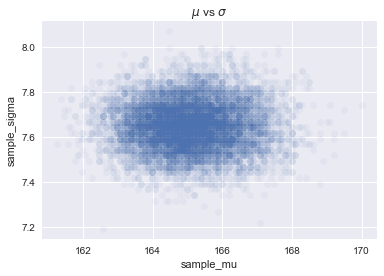

In [31]:
idxs = np.random.choice(np.arange(len(mu_list2)*len(sigma_list2)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list2)*len(sigma_list2)))
sample_mu2 = mu_list2[idxs//len(mu_list2)]
sample_sigma2 = sigma_list[np.mod(idxs, len(sigma_list2))]

f, ax = plt.subplots(1, 1)
ax.plot(sample_mu2, sample_sigma2, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.23

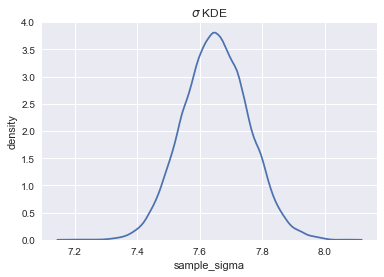

In [32]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(sample_sigma2, ax=ax)
ax.set_xlabel("sample_sigma")
ax.set_ylabel("density")
ax.set_title("$\sigma$ KDE");

### 4.24

In [33]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d["age"] >=18]

### 4.25

In [34]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

### 4.26

Since I'm using the PyMC3's [recommended implementation](https://github.com/pymc-devs/resources/blob/master/Rethinking/Chp_04.ipynb) for this book, I'll follow their lead in switching directly to MCMC.

In [35]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1396.88draws/s]


### 4.27

Since these values are estimated from samples, the values will be slightly different from those given by `find_MAP`

In [36]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.41,0.01,153.94,155.22,2127.15,1.0
sigma,7.78,0.29,0.01,7.33,8.26,2317.76,1.0


### 4.28

In [37]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2["height"].mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2["height"].std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

In [38]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

pm.summary(trace_4_1, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1057.43draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.42,0.01,153.98,155.30,2045.90,1.0
sigma,7.77,0.30,0.01,7.30,8.24,2165.55,1.0


### 4.29

In [39]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_2 = pm.sample(1000, tune=1000)

pm.summary(trace_4_2, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1563.71draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,177.86,0.10,0.00,177.69,178.01,2058.99,1.0
sigma,24.62,0.93,0.02,23.21,26.16,2339.41,1.0


### 4.30

In [40]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.172933,0.002555
sigma,0.002555,0.088309


### 4.31

In [41]:
print(np.diag(trace_df.cov()))
print(trace_df.corr())

[0.17293253 0.08830856]
             mu     sigma
mu     1.000000  0.020679
sigma  0.020679  1.000000


### 4.32

Increasing the number of samples

In [42]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_1 = pm.sample(int(1e4), tune=1000)
    post = pm.trace_to_dataframe(trace_4_1)
    
post.head()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:15<00:00, 1418.72draws/s]


,mu,sigma
0,154.008458,7.312280
1,154.876109,8.463834
2,154.797246,8.124105
3,154.139781,7.383517
4,154.256910,7.556275


### 4.33

In [43]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.41,0.0,153.9,155.21,21262.13,1.0
sigma,7.77,0.29,0.0,7.3,8.23,20320.38,1.0


### 4.34

In [44]:
stats.multivariate_normal.rvs(mean=post.mean(), cov=post.cov(), size=10)

array([[154.48672696,   7.50980141],
       [154.49203643,   7.72690073],
       [154.50529013,   7.96975357],
       [154.64246373,   7.32947671],
       [154.36907831,   7.62775593],
       [154.989173  ,   7.77967583],
       [154.29663692,   7.71737762],
       [154.28746882,   8.18487946],
       [154.30305085,   7.71548542],
       [154.87995498,   7.3060764 ]])

### 4.35

In [45]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    log_sigma = pm.Normal('log_sigma', mu=2, sd=10)
    height = pm.Normal("height", mu=mu, sd=np.exp(log_sigma), observed=d2["height"])

### 4.36

In [46]:
with m4_1_logsigma:
    trace_4_1_logsigma = pm.sample(int(1e4), tune=1000)
    post = pm.trace_to_dataframe(trace_4_1_logsigma)
    sigma = np.exp(post["log_sigma"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_sigma, mu]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:19<00:00, 1151.82draws/s]
